### Importing stuffs

In [182]:
import numpy as np
import random
import matplotlib.pyplot as plt
import cv2
import math

In [95]:
def display_multiple_img(images, rows = 1, cols=1):
    figure, ax = plt.subplots(nrows=rows,ncols=cols )
    for ind,title in enumerate(images):
        ax.ravel()[ind].imshow(images[title])
        ax.ravel()[ind].set_title(title,color="red")
        ax.ravel()[ind].set_axis_off()
    plt.tight_layout()
    plt.show()

### Write a program which does:

#### (a) Generate noisy images with gaussian noise(amplitude of 10 and 30)

#### (b) Generate noisy images with salt-and-pepper noise( probability 0.1 and 0.05)

#### (c) Use the 3x3, 5x5 box filter on images generated by (a)(b)

#### (d) Use 3x3, 5x5 median filter on images generated by (a)(b)

#### (e) Use both opening-then-closing and closing-then opening filter (using the octogonal 3-5-5-5-3 kernel, value = 0) on images generated by (a)(b)

#### You must calculate the signal-to-ratio (SNR) for each instance (4 noisy images and 24 processed images)

### Announcement

* You must include your noisy image before processing and after processing in your report.
* You must calculate the signal-to-ratio (SNR) for each instance and write them in your report. Use this formula if any conflicts occur.
* You are to generate gaussian noise with amplitude of 10 and 30, salt-and-pepper noise with probability 0.1 and 0.05. 
* You must use the 3x3, 5x5 box filter and median filter, both opening-then-closing and closing-then opening filter (using the octogonal 3-5-5-5-3 kernel, value = 0) on those images. 
* You will produce 24 images and 4 noise figures.
* Here is a simple pseudo normal random number generator with mean 0 and variance 1. If your programming language provides an API for pseudo normal random numbers (i.e., randn in matlab, you may use it as an exception to hard code programming.
* You can use any programing language to implement homework, however, you'll get zero point if you just call existing library.

### Importing image 

In [3]:
lena=cv2.imread('lena.bmp')

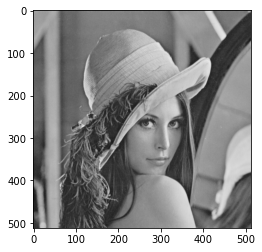

In [32]:
plt.imshow(lena)

##### Changing the value of RGB in the image

In [28]:
def change_3_value(imgrc,value,num):
    for i in range(num):
        imgrc[i]=value

##### testing the function

In [84]:
def To3D2D(img):
    re_img=np.zeros((img.shape[0],img.shape[1]), dtype=np.int)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            re_img[i,j]=img[i,j,0]
    return re_img

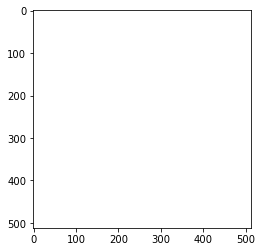

In [56]:
test=lena.copy()
for i in range(lena.shape[0]):
    for j in range(lena.shape[1]):
        change_3_value(test[i,j],255,3)
plt.imshow(test)

### (a) Generate additive white Gaussian noise 

In [54]:
def gua_noise(img,amp):
    gua_img=img.copy()
    for l in range(img.shape[0]):
        for p in range(img.shape[1]):
            noise=int(img[l,p,0]+amp*random.gauss(0,1))
            if noise >255:
                noise=255
            change_3_value(gua_img[l,p],noise,3)
            #for i in range(3):
            #    gua_img[l,p,i]=noise
    return gua_img


#### Gaussian noise with amplitude = 10

In [51]:
gua_10_img=gua_noise(lena,10)

#### Gaussian noise with amplitude = 30

In [52]:
gua_30_img=gua_noise(lena,30)

### (b) Generate salt-and-pepper noise

In [33]:
def salt_pepper(img,thr):
    s_p_img=img.copy()
    for l in range(img.shape[0]):
        for p in range(img.shape[1]):
            ran_value=random.uniform(0,1)
            return_val=img[l,p,0]
            if (ran_value<=thr):
                change_3_value(s_p_img[l,p],0,3)
            elif (ran_value>=1-thr):
                change_3_value(s_p_img[l,p],255,3)           
    return s_p_img

In [40]:
salt_pep_img_005=salt_pepper(lena,0.05)

In [38]:
salt_pep_img_01=salt_pepper(lena,0.1)

In [102]:
noise_images={"gaussian noise: 10":gua_10_img,"gaussian noise: 30":gua_30_img,"salt & pepper: 0.05":salt_pep_img_005,"salt & pepper: 0.10":salt_pep_img_01}

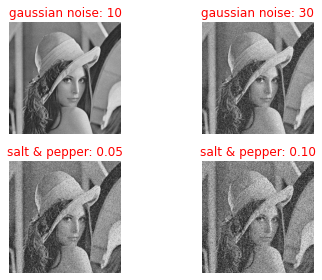

In [96]:
display_multiple_img(noise_images, 2, 2)

#### output nopise images

In [53]:
cv2.imwrite('HW8-a-1(gua_10).jpg', gua_10_img)
cv2.imwrite('HW8-a-2(gua_30).jpg', gua_30_img)
cv2.imwrite('HW8-b-1(salt_pep_005).jpg', salt_pep_img_005)
cv2.imwrite('HW8-b-2(salt_pep_01).jpg', salt_pep_img_01)

True

### (c) Use the 3x3, 5x5 box filter on images generated by (a)(b)

In [85]:
def box_filiter(img,kernel_size):
    H=img.shape[0]
    W=img.shape[1]
    
    shift=int((kernel_size-1)/2)
    size=kernel_size*kernel_size
    fi_img=To3D2D(img)
    pad_img=np.pad(fi_img, shift, mode='constant',constant_values=-1)
    for l in range(H):
        for p in range(W):
            count=size
            sum_value=0
            for k in range(-shift,shift+1):
                for s in range(-shift,shift+1):
                    value=pad_img[l+shift+k,p+shift+s]
                    if (value<0):
                        count=count-1
                    else:
                        sum_value=sum_value+value
            fi_img[l,p]=int(sum_value/count)
    re_img=np.stack((fi_img,fi_img,fi_img), axis = -1)
    return re_img                   

In [86]:
gua_10_box_3=box_filiter(gua_10_img,3)

In [88]:
gua_10_box_5=box_filiter(gua_10_img,5)

In [97]:
gua_30_box_3=box_filiter(gua_30_img,3)

In [98]:
gua_30_box_5=box_filiter(gua_30_img,5)

In [100]:
box_noise_images={"box filiter 3x3 gau noise:10":gua_10_box_3,"box filiter 5x5 gau noise:10":gua_10_box_5,"box filiter 3x3 gau noise:30":gua_30_box_3,"box filiter 5x5 gau noise:30":gua_30_box_5}

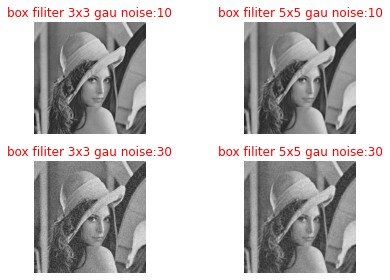

In [101]:
display_multiple_img(box_noise_images, 2, 2)

#### output nopise images

In [103]:
cv2.imwrite('HW8-c-1(box 3x3)(gua_10).jpg', gua_10_box_3)
cv2.imwrite('HW8-c-2(box 5x5)(gua_10).jpg', gua_10_box_5)
cv2.imwrite('HW8-c-3(box 3x3)(gua_30).jpg', gua_30_box_3)
cv2.imwrite('HW8-c-4(box 5x5)(gua_30).jpg', gua_30_box_5)

True

In [104]:
salt_pep_005_box_3=box_filiter(salt_pep_img_005,3)

In [105]:
salt_pep_005_box_5=box_filiter(salt_pep_img_005,5)

In [106]:
salt_pep_01_box_3=box_filiter(salt_pep_img_01,3)

In [107]:
salt_pep_01_box_5=box_filiter(salt_pep_img_01,5)

In [108]:
box_sp_noise_images={"box filiter 3x3 salt&pep:0.05":salt_pep_005_box_3,"box filiter 5x5 salt&pep:0.05":salt_pep_005_box_5,"box filiter 3x3 salt&pep:0.1":salt_pep_01_box_3,"box filiter 5x5 salt&pep:0.1":salt_pep_01_box_5}

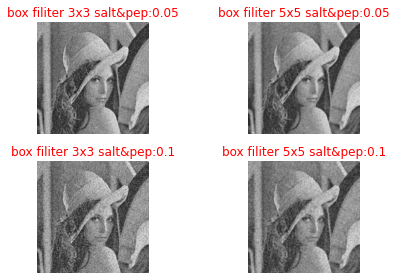

In [109]:
display_multiple_img(box_sp_noise_images, 2, 2)

#### output nopise images

In [124]:
cv2.imwrite('HW8-c-5(box 3x3)(salt_pep_005).jpg', salt_pep_005_box_3)
cv2.imwrite('HW8-c-6(box 5x5)(salt_pep_005).jpg', salt_pep_005_box_5)
cv2.imwrite('HW8-c-7(box 3x3)(salt_pep_01).jpg', salt_pep_01_box_3)
cv2.imwrite('HW8-c-8(box 5x5)(salt_pep_01).jpg', salt_pep_01_box_5)

True

### (d) Use 3x3, 5x5 median filter on images generated by (a)(b)

In [113]:
def median(lst):
    n = len(lst)
    s = sorted(lst)
    return (sum(s[n//2-1:n//2+1])/2.0, s[n//2])[n % 2] if n else None

In [114]:
def median_filter(img,kernel_size):
    H=img.shape[0]
    W=img.shape[1]
    
    shift=int((kernel_size-1)/2)
    size=kernel_size*kernel_size
    fi_img=To3D2D(img)
    pad_img=np.pad(fi_img, shift, mode='constant',constant_values=-1)
    for l in range(H):
        for p in range(W):
            neighbors=[]
            for k in range(-shift,shift+1):
                for s in range(-shift,shift+1):
                    value=pad_img[l+shift+k,p+shift+s]
                    if (value>=0):
                        neighbors.append(value)
            fi_img[l,p]=int(median(neighbors))
    re_img=np.stack((fi_img,fi_img,fi_img), axis = -1)
    return re_img

#### Executing the median_filter function

In [115]:
gua_10_med_3=median_filter(gua_10_img,3)

In [117]:
gua_10_med_5=median_filter(gua_10_img,5)

In [119]:
gua_30_med_3=median_filter(gua_30_img,3)

In [120]:
gua_30_med_5=median_filter(gua_30_img,5)

In [122]:
med_noise_images={"median filiter 3x3 gau noise:10":gua_10_med_3,"median filiter 5x5 gau noise:10":gua_10_med_5,"median filiter 3x3 gau noise:30":gua_30_med_3,"median filiter 5x5 gau noise:30":gua_30_med_5}

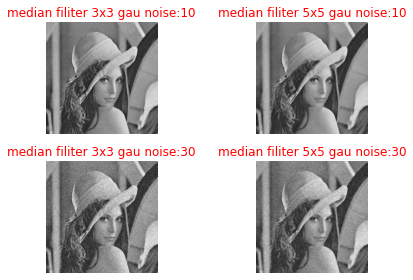

In [123]:
display_multiple_img(med_noise_images, 2, 2)

#### output nopise images

In [125]:
cv2.imwrite('HW8-d-1(med 3x3)(gua_10).jpg', gua_10_med_3)
cv2.imwrite('HW8-d-2(med 5x5)(gua_10).jpg', gua_10_med_5)
cv2.imwrite('HW8-d-3(med 3x3)(gua_30).jpg', gua_30_med_3)
cv2.imwrite('HW8-d-4(med 5x5)(gua_30).jpg', gua_30_med_5)

True

In [127]:
salt_pep_005_med_3=median_filter(salt_pep_img_005,3)

In [128]:
salt_pep_005_med_5=median_filter(salt_pep_img_005,5)

In [129]:
salt_pep_01_med_3=median_filter(salt_pep_img_01,3)

In [130]:
salt_pep_01_med_5=median_filter(salt_pep_img_01,5)

In [131]:
med_sp_noise_images={"median filiter 3x3 salt&pep:0.05":salt_pep_005_med_3,"median filiter 5x5 salt&pep:0.05":salt_pep_005_med_5,
                     "median filiter 3x3 salt&pep:0.1":salt_pep_01_med_3,"median filiter 5x5 salt&pep:0.1":salt_pep_01_med_5}

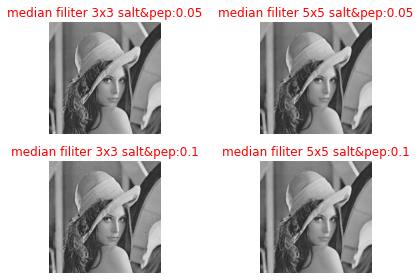

In [132]:
display_multiple_img(med_sp_noise_images, 2, 2)

#### output nopise images

In [133]:
cv2.imwrite('HW8-d-5(med 3x3)(salt_pep_005).jpg', salt_pep_005_med_3)
cv2.imwrite('HW8-d-6(med 5x5)(salt_pep_005).jpg', salt_pep_005_med_5)
cv2.imwrite('HW8-d-7(med 3x3)(salt_pep_01).jpg', salt_pep_01_med_3)
cv2.imwrite('HW8-d-8(med 5x5)(salt_pep_01).jpg', salt_pep_01_med_5)

True

### (e) opening-then-closing and closing-then opening filter (using the octogonal 3-5-5-5-3 kernel, value = 0)

##### Dilation function

In [135]:
def dilation(image,kernel):
    L_len=image.shape[0]
    P_len=image.shape[1]
    new_img=np.zeros((L_len,P_len), dtype=np.int)
    ker_l=int((kernel.shape[0]-1)/2)
    ker_p=int((kernel.shape[1]-1)/2)
    
    for l in range(L_len):
        for p in range(P_len):
            
            if(l-ker_l<0):    
                l_start=0
            else:
                l_start=l-ker_l

            if(l+ker_l>L_len-1):    
                l_end=L_len-1
            else:
                l_end=l+ker_l

            if(p-ker_p<0):    
                p_start=0
            else:
                p_start=p-ker_p

            if(p+ker_p>P_len-1):    
                p_end=P_len-1
            else:
                p_end=p+ker_p
            max=0
            for i in range(l_start,l_end+1):
                for j in range(p_start,p_end+1):
                    if(image[i,j,0]*kernel[i-l+ker_l,j-p+ker_p]>max):
                        max=image[i,j,0]*kernel[i-l+ker_l,j-p+ker_p]
            new_img[l,p]=max
                
    re_img=np.stack((new_img, new_img, new_img), axis = -1) 
                        
    return re_img

##### Erosion

In [136]:
def erosion(image,kernel):
    L_len=image.shape[0]
    P_len=image.shape[1]
    new_img=np.copy(image[:,:,0])
    ker_l=int((kernel.shape[0]-1)/2)
    ker_p=int((kernel.shape[1]-1)/2)
    
    # for the marginal pixels, they should be 0
    for l in [0,1,L_len-2,L_len-1]:
        for p in range(P_len):
            new_img[l,p]=0
    for p in [0,1,P_len-2,P_len-1]:
        for l in range(L_len):
            new_img[l,p]=0
    
    for l in range(ker_l,L_len-ker_l):
        for p in range(ker_p,P_len-ker_p):
            
            l_start=l-ker_l
            l_end=l+ker_l
            p_start=p-ker_p
            p_end=p+ker_p
            
            min=256
            for i in range(l_start,l_end+1):
                for j in range(p_start,p_end+1):
                    if(kernel[i-l+ker_l,j-p+ker_p]==1):
                        if(image[i,j,0]<min):
                            min=image[i,j,0]
            new_img[l,p]=min

    re_img=np.stack((new_img, new_img, new_img), axis = -1) 
                        
    return re_img

In [137]:
default_kernel=np.zeros((5,5), dtype=np.int)
octogona_kernel=default_kernel
for i in [0,4]:
    for j in range(1,4):
        octogona_kernel[i,j]=1
for i in [1,2,3]:
    for  j in range(5):
        octogona_kernel[i,j]=1

##### Opening
$$
(B \ominus K) \oplus K 
$$

In [138]:
def opening(img,kernel):
    re_img=dilation(erosion(img,kernel),kernel)
    return re_img

##### Closing
$$
(B \oplus K) \ominus K 
$$

In [140]:
def closing(img,kernel):
    re_img=erosion(dilation(img,kernel),kernel)
    return re_img

##### Opening then Closing (gua noise)

In [141]:
gua_10_op_cl=closing(opening(gua_10_img,octogona_kernel),octogona_kernel)

In [142]:
gua_30_op_cl=closing(opening(gua_30_img,octogona_kernel),octogona_kernel)

#####  Closing then Opening (gua noise)

In [143]:
gua_10_cl_op=opening(closing(gua_10_img,octogona_kernel),octogona_kernel)

In [144]:
gua_30_cl_op=opening(closing(gua_30_img,octogona_kernel),octogona_kernel)

##### Opening then Closing (salt and pepper noise)

In [145]:
salt_pep_005_op_cl=closing(opening(salt_pep_img_005,octogona_kernel),octogona_kernel)
salt_pep_01_op_cl=closing(opening(salt_pep_img_01,octogona_kernel),octogona_kernel)

#####  Closing then Opening (salt and pepper noise)

In [146]:
salt_pep_005_cl_op=opening(closing(salt_pep_img_005,octogona_kernel),octogona_kernel)
salt_pep_01_cl_op=opening(closing(salt_pep_img_01,octogona_kernel),octogona_kernel)

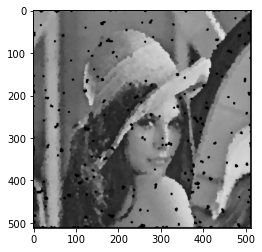

In [155]:
plt.imshow(salt_pep_005_op_cl)

In [156]:
op_cl_all_noises_images={"open & close gau noise:10":gua_10_op_cl,"open & close gau noise:30":gua_30_op_cl,
                     "open & close salt&pep:0.05":salt_pep_005_op_cl,"open & close salt&pep:0.1":salt_pep_01_op_cl}

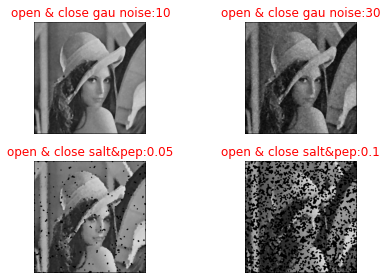

In [157]:
display_multiple_img(op_cl_all_noises_images, 2, 2)

In [158]:
cl_op_all_noises_images={"close & open gau noise:10":gua_10_cl_op,"close & open gau noise:30":gua_30_cl_op,
                     "close & open salt&pep:0.05":salt_pep_005_cl_op,"close & open salt&pep:0.1":salt_pep_01_cl_op}

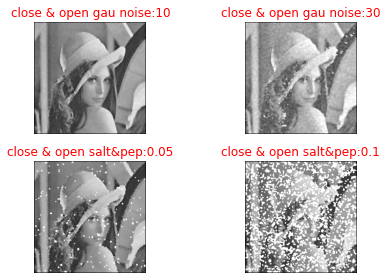

In [159]:
display_multiple_img(cl_op_all_noises_images, 2, 2)

#### output nopise images

In [160]:
cv2.imwrite('HW8-e-1(open->close)(gua_10).jpg', gua_10_op_cl)
cv2.imwrite('HW8-e-2(open->close)(gua_30).jpg', gua_30_op_cl)
cv2.imwrite('HW8-e-3(open->close)(salt_pep_005).jpg', salt_pep_005_op_cl)
cv2.imwrite('HW8-e-4(open->close)(salt_pep_01).jpg', salt_pep_01_op_cl)

True

In [161]:
cv2.imwrite('HW8-e-5(close->open)(gua_10).jpg', gua_10_cl_op)
cv2.imwrite('HW8-e-6(close->open)(gua_30).jpg', gua_30_cl_op)
cv2.imwrite('HW8-e-7(close->open)(salt_pep_005).jpg', salt_pep_005_cl_op)
cv2.imwrite('HW8-e-8(close->open)(salt_pep_01).jpg', salt_pep_01_cl_op)

True

#### S/N ratio (signal to noise ratio):
$$SNR=20\times log_{10}\frac{\sqrt {VS}}{\sqrt {VN}}$$

In [187]:
lena2D=To3D2D(lena)

VS: image gray level variance
$$VS=\frac{\sum_{\forall n}{(I(i,j)-\mu_s)^2}}{\Vert{n} \Vert}$$

In [237]:
def VS(img):
    vs=0
    mean=(np.mean(img))
    count=np.prod(img.shape)
    sum_i=0
    for l in range(img.shape[0]):
        for p in range(img.shape[1]):
            sum_i=sum_i+(img[l,p]-mean)**2
    vs=sum_i/count
    return vs

VN: noise variance
$$VN=\frac{\sum_{\forall n}{(I_{noises}(i,j)-I(i,j)-\mu_{noises})^2}}{\Vert{n} \Vert}$$

In [210]:
def VN(n_img,img):
    vn=0
    n_mean=(np.mean(n_img)-np.mean(img))
    count=np.prod(n_img.shape)
    sum_i=0
    for l in range(n_img.shape[0]):
        for p in range(n_img.shape[1]):
            sum_i=sum_i+(n_img[l,p]-img[l,p]-n_mean)**2
    vn=sum_i/count
    return vn

In [221]:
def SNR(n_img,img):
    n_img_2D=To3D2D(n_img)
    img_2D=To3D2D(img)
    snr=20*math.log10((VS(img_2D)/VN(n_img_2D,img_2D))**(.5))
    return snr

#### SNR of noises images

In [223]:
snr_lena=SNR(lena,lena)
snr_gua_10=SNR(gua_10_img,lena)
snr_gua_30=SNR(gua_30_img,lena)
snr_salt_pep_005=SNR(salt_pep_img_005,lena)
snr_salt_pep_01=SNR(salt_pep_img_01,lena)

<ipython-input-221-6289ba126bda>:4: RuntimeWarning: divide by zero encountered in double_scalars
  snr=20*math.log10((VS(img_2D)/VN(n_img_2D,img_2D))**(.5))


##### signal to noise ratio 
* original lena image
* gaussian noise with amplitude of 10
* gaussian noise with amplitude of 30
* salt-and-pepper noise with probability 0.05
* salt-and-pepper noise with probability 0.1

In [224]:
print(round(snr_lena,2))
print(round(snr_gua_10,2))
print(round(snr_gua_30,2))
print(round(snr_salt_pep_005,2))
print(round(snr_salt_pep_01,2))

inf
13.59
2.77
0.97
-2.1


#### SNR of box filiter on noises images

##### gaussian noise

In [225]:
snr_gua_10_box_3=SNR(gua_10_box_3,lena)
snr_gua_10_box_5=SNR(gua_10_box_5,lena)
snr_gua_30_box_3=SNR(gua_30_box_3,lena)
snr_gua_30_box_5=SNR(gua_30_box_5,lena)

##### signal to noise ratio 
* 3x3 box filiter on gaussian noise with amplitude of 10
* 5x5 box filiter on gaussian noise with amplitude of 10
* 3x3 box filiter on gaussian noise with amplitude of 30
* 5x5 box filiter on gaussian noise with amplitude of 30

In [226]:
print(round(snr_gua_10_box_3,2))
print(round(snr_gua_10_box_5,2))
print(round(snr_gua_30_box_3,2))
print(round(snr_gua_30_box_5,2))

17.72
14.85
10.72
11.69


##### salt-and-pepper noise

In [227]:
snr_salt_pep_005_box_3=SNR(salt_pep_005_box_3,lena)
snr_salt_pep_005_box_5=SNR(salt_pep_005_box_5,lena)
snr_salt_pep_01_box_3=SNR(salt_pep_01_box_3,lena)
snr_salt_pep_01_box_5=SNR(salt_pep_01_box_5,lena)

##### signal to noise ratio 
* 3x3 box filiter on salt-and-pepper noise with probability 0.05
* 5x5 box filiter on salt-and-pepper noise with probability 0.05
* 3x3 box filiter on salt-and-pepper noise with probability 0.1
* 5x5 box filiter on salt-and-pepper noise with probability 0.1

In [228]:
print(round(snr_salt_pep_005_box_3,2))
print(round(snr_salt_pep_005_box_5,2))
print(round(snr_salt_pep_01_box_3,2))
print(round(snr_salt_pep_01_box_5,2))

9.49
11.2
6.35
8.58


#### SNR of median filter on noises images

##### gaussian noise

In [229]:
snr_gua_10_med_3=SNR(gua_10_med_3,lena)
snr_gua_10_med_5=SNR(gua_10_med_5,lena)
snr_gua_30_med_3=SNR(gua_30_med_3,lena)
snr_gua_30_med_5=SNR(gua_30_med_5,lena)

##### signal to noise ratio 
* 3x3 median filiter on gaussian noise with amplitude of 10
* 5x5 median filiter on gaussian noise with amplitude of 10
* 3x3 median filiter on gaussian noise with amplitude of 30
* 5x5 median filiter on gaussian noise with amplitude of 30

In [230]:
print(round(snr_gua_10_med_3,2))
print(round(snr_gua_10_med_5,2))
print(round(snr_gua_30_med_3,2))
print(round(snr_gua_30_med_5,2))

17.65
15.98
10.87
12.62


##### salt-and-pepper noise

In [231]:
snr_salt_pep_005_med_3=SNR(salt_pep_005_med_3,lena)
snr_salt_pep_005_med_5=SNR(salt_pep_005_med_5,lena)
snr_salt_pep_01_med_3=SNR(salt_pep_01_med_3,lena)
snr_salt_pep_01_med_5=SNR(salt_pep_01_med_5,lena)

##### signal to noise ratio 
* 3x3 median filiter on salt-and-pepper noise with probability 0.05
* 5x5 median filiter on salt-and-pepper noise with probability 0.05
* 3x3 median filiter on salt-and-pepper noise with probability 0.1
* 5x5 median filiter on salt-and-pepper noise with probability 0.1

In [232]:
print(round(snr_salt_pep_005_med_3,2))
print(round(snr_salt_pep_005_med_5,2))
print(round(snr_salt_pep_01_med_3,2))
print(round(snr_salt_pep_01_med_5,2))

19.26
16.4
14.88
15.76


#### SNR of both opening-then-closing and closing-then opening filter on noises images

##### gaussian noise

In [233]:
snr_gua_10_op_cl=SNR(gua_10_op_cl,lena)
snr_gua_30_op_cl=SNR(gua_30_op_cl,lena)
snr_gua_10_cl_op=SNR(gua_10_cl_op,lena)
snr_gua_30_cl_op=SNR(gua_30_cl_op,lena)

##### signal to noise ratio 
* opening-then-closing filter on gaussian noise with amplitude of 10
* opening-then-closing filter on gaussian noise with amplitude of 30
* closing-then opening filter on gaussian noise with amplitude of 10
* closing-then opening filter on gaussian noise with amplitude of 30

In [234]:
print(round(snr_gua_10_op_cl,2))
print(round(snr_gua_30_op_cl,2))
print(round(snr_gua_10_cl_op,2))
print(round(snr_gua_30_cl_op,2))

8.61
8.52
7.64
4.57


##### salt-and-pepper noise

In [235]:
snr_salt_pep_005_op_cl=SNR(salt_pep_005_op_cl,lena)
snr_salt_pep_01_op_cl=SNR(salt_pep_01_op_cl,lena)
snr_salt_pep_005_cl_op=SNR(salt_pep_005_cl_op,lena)
snr_salt_pep_01_cl_op=SNR(salt_pep_01_cl_op,lena)

##### signal to noise ratio 
* opening-then-closing filter on salt-and-pepper noise with probability 0.05
* opening-then-closing filter on salt-and-pepper noise with probability 0.1
* closing-then opening filter on salt-and-pepper noise with probability 0.05
* closing-then opening filter on salt-and-pepper noise with probability 0.1

In [236]:
print(round(snr_salt_pep_005_op_cl,2))
print(round(snr_salt_pep_01_op_cl,2))
print(round(snr_salt_pep_005_cl_op,2))
print(round(snr_salt_pep_01_cl_op,2))

4.66
-2.22
4.07
-2.86
